In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score

In [94]:
df = pd.read_csv("heart_disease.csv")

In [95]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [96]:
df.shape

(10000, 21)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [98]:
df.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [99]:
categorical_data = df.select_dtypes(include=['object'])
continuos_data = df.select_dtypes(include=['int64', 'float64'])
for columns in categorical_data:
  print(f"\n{columns} value counts:")
  print(df[columns].value_counts())


Gender value counts:
Gender
Male      5003
Female    4978
Name: count, dtype: int64

Exercise Habits value counts:
Exercise Habits
High      3372
Medium    3332
Low       3271
Name: count, dtype: int64

Smoking value counts:
Smoking
Yes    5123
No     4852
Name: count, dtype: int64

Family Heart Disease value counts:
Family Heart Disease
No     5004
Yes    4975
Name: count, dtype: int64

Diabetes value counts:
Diabetes
No     5018
Yes    4952
Name: count, dtype: int64

High Blood Pressure value counts:
High Blood Pressure
Yes    5022
No     4952
Name: count, dtype: int64

Low HDL Cholesterol value counts:
Low HDL Cholesterol
Yes    5000
No     4975
Name: count, dtype: int64

High LDL Cholesterol value counts:
High LDL Cholesterol
No     5036
Yes    4938
Name: count, dtype: int64

Alcohol Consumption value counts:
Alcohol Consumption
Medium    2500
Low       2488
High      2426
Name: count, dtype: int64

Stress Level value counts:
Stress Level
Medium    3387
Low       3320
High      32

In [100]:
for columns in categorical_data:
    print(df[columns].unique())
    #plt.bar(df[columns].unique(),df[columns].value_counts())

['Male' 'Female' nan]
['High' 'Low' 'Medium' nan]
['Yes' 'No' nan]
['Yes' 'No' nan]
['No' 'Yes' nan]
['Yes' 'No' nan]
['Yes' 'No' nan]
['No' 'Yes' nan]
['High' 'Medium' 'Low' nan]
['Medium' 'High' 'Low' nan]
['Medium' 'Low' 'High' nan]
['No' 'Yes']


In [101]:
if df.duplicated().any():
  print("Duplicate data exists in the dataset!")
else:
  print("No duplicate data found in the dataset!")

No duplicate data found in the dataset!


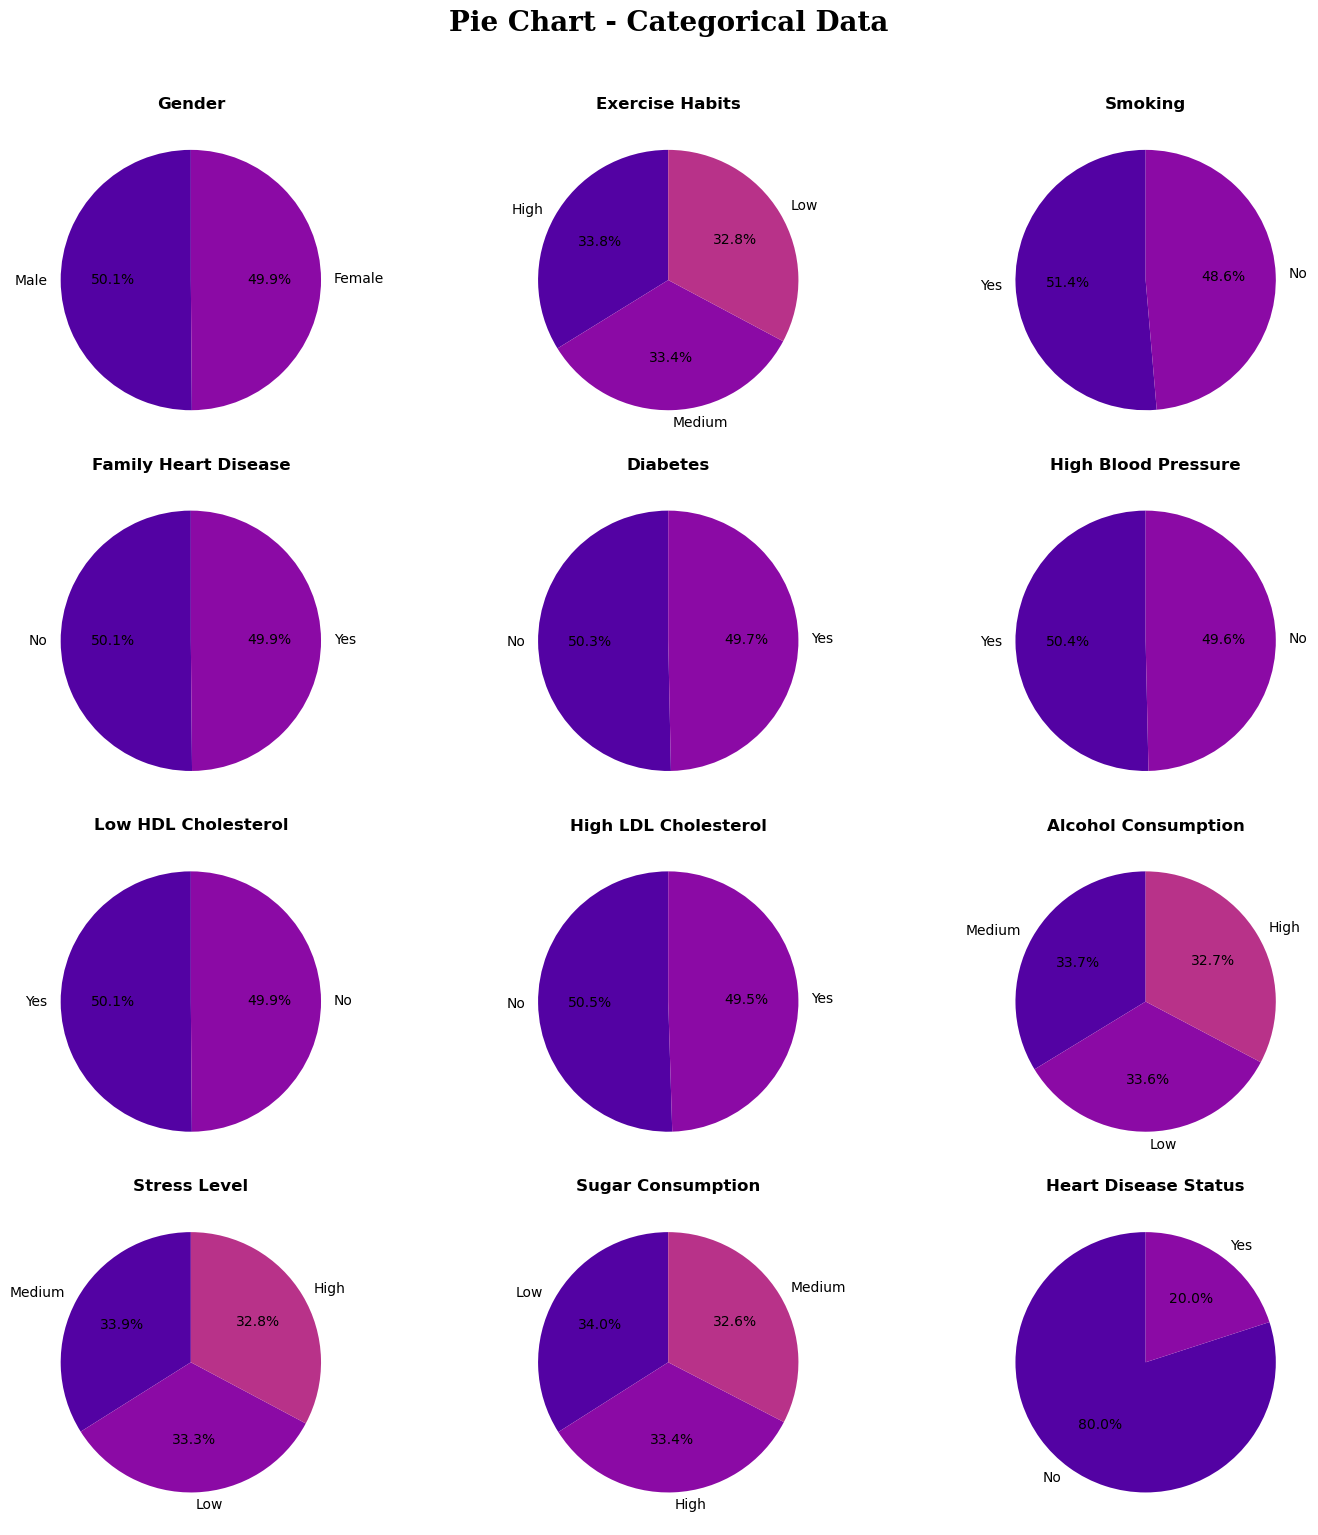

In [102]:
# Generate Pie Charts to display the Categorical Data
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, var in enumerate(df[categorical_data.columns]):

    # Use Seaborn's color palette
    color_pallette = sns.color_palette('plasma')

    counts = df[categorical_data.columns][var].value_counts()

    # Plot pie chart
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=color_pallette, startangle=90)
    axes[i].set_title(var,fontweight='bold')


fig.suptitle(
    "Pie Chart - Categorical Data",
    fontsize=20,
    fontweight='bold',
    fontfamily='serif',
    y=1.02
)

plt.tight_layout()
plt.show()


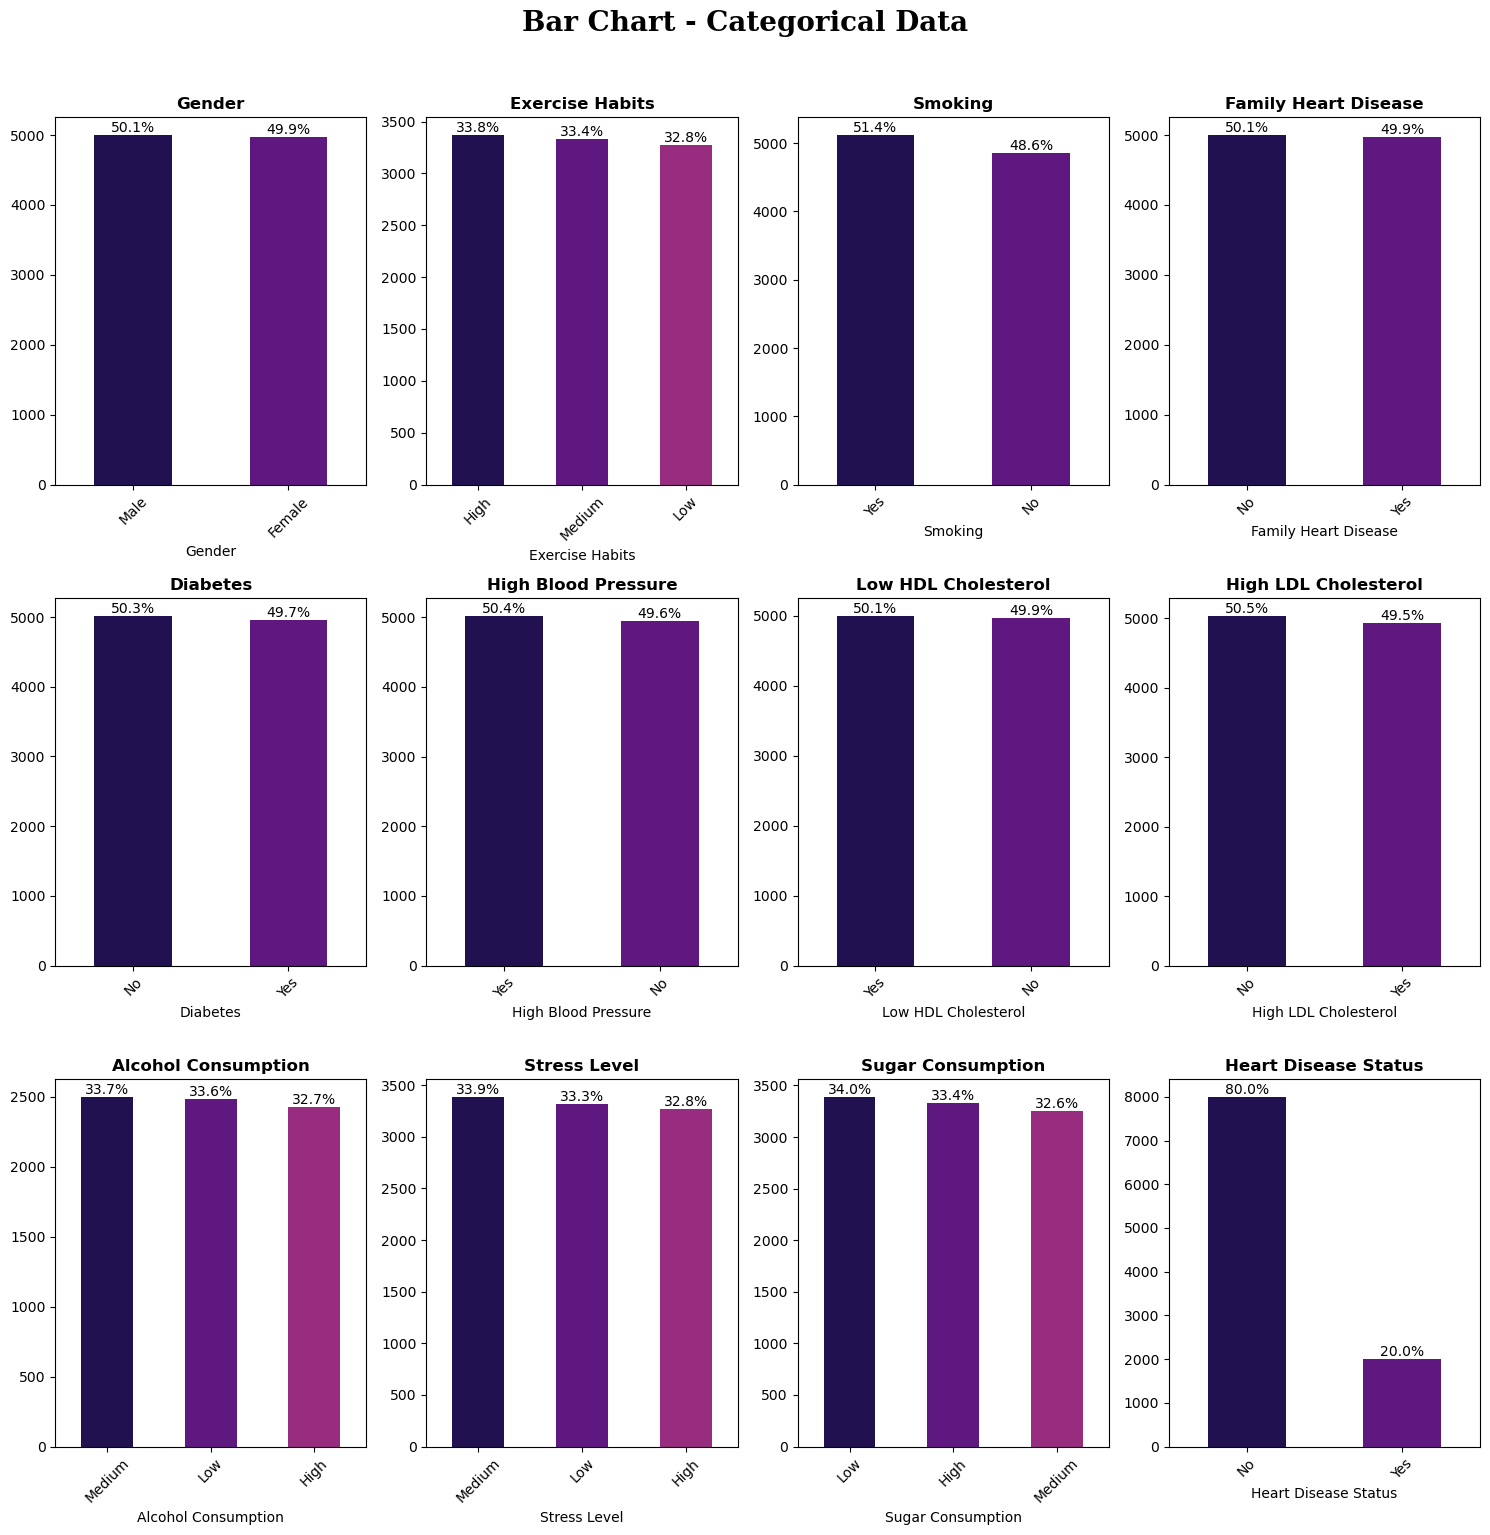

In [103]:
fig, axs = plt.subplots(3, 4, figsize=(15, 15))
axs = axs.flatten()


color_pallette = sns.color_palette('magma')

for i, column in enumerate(categorical_data.columns):
    value_counts = df[column].value_counts()
    # Use a colormap to get different colors for bars
    ax = value_counts.plot(kind='bar', ax=axs[i], color=color_pallette)
    axs[i].set_title(column, fontweight='bold')
    axs[i].tick_params(axis='x', rotation=45) # Rotate labels for better readability


    # Add percentage labels on top of bars
    total = value_counts.sum()
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2.
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')


    fig.suptitle(
        "Bar Chart - Categorical Data",
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
        y=1.02
    )



plt.tight_layout()
plt.show()

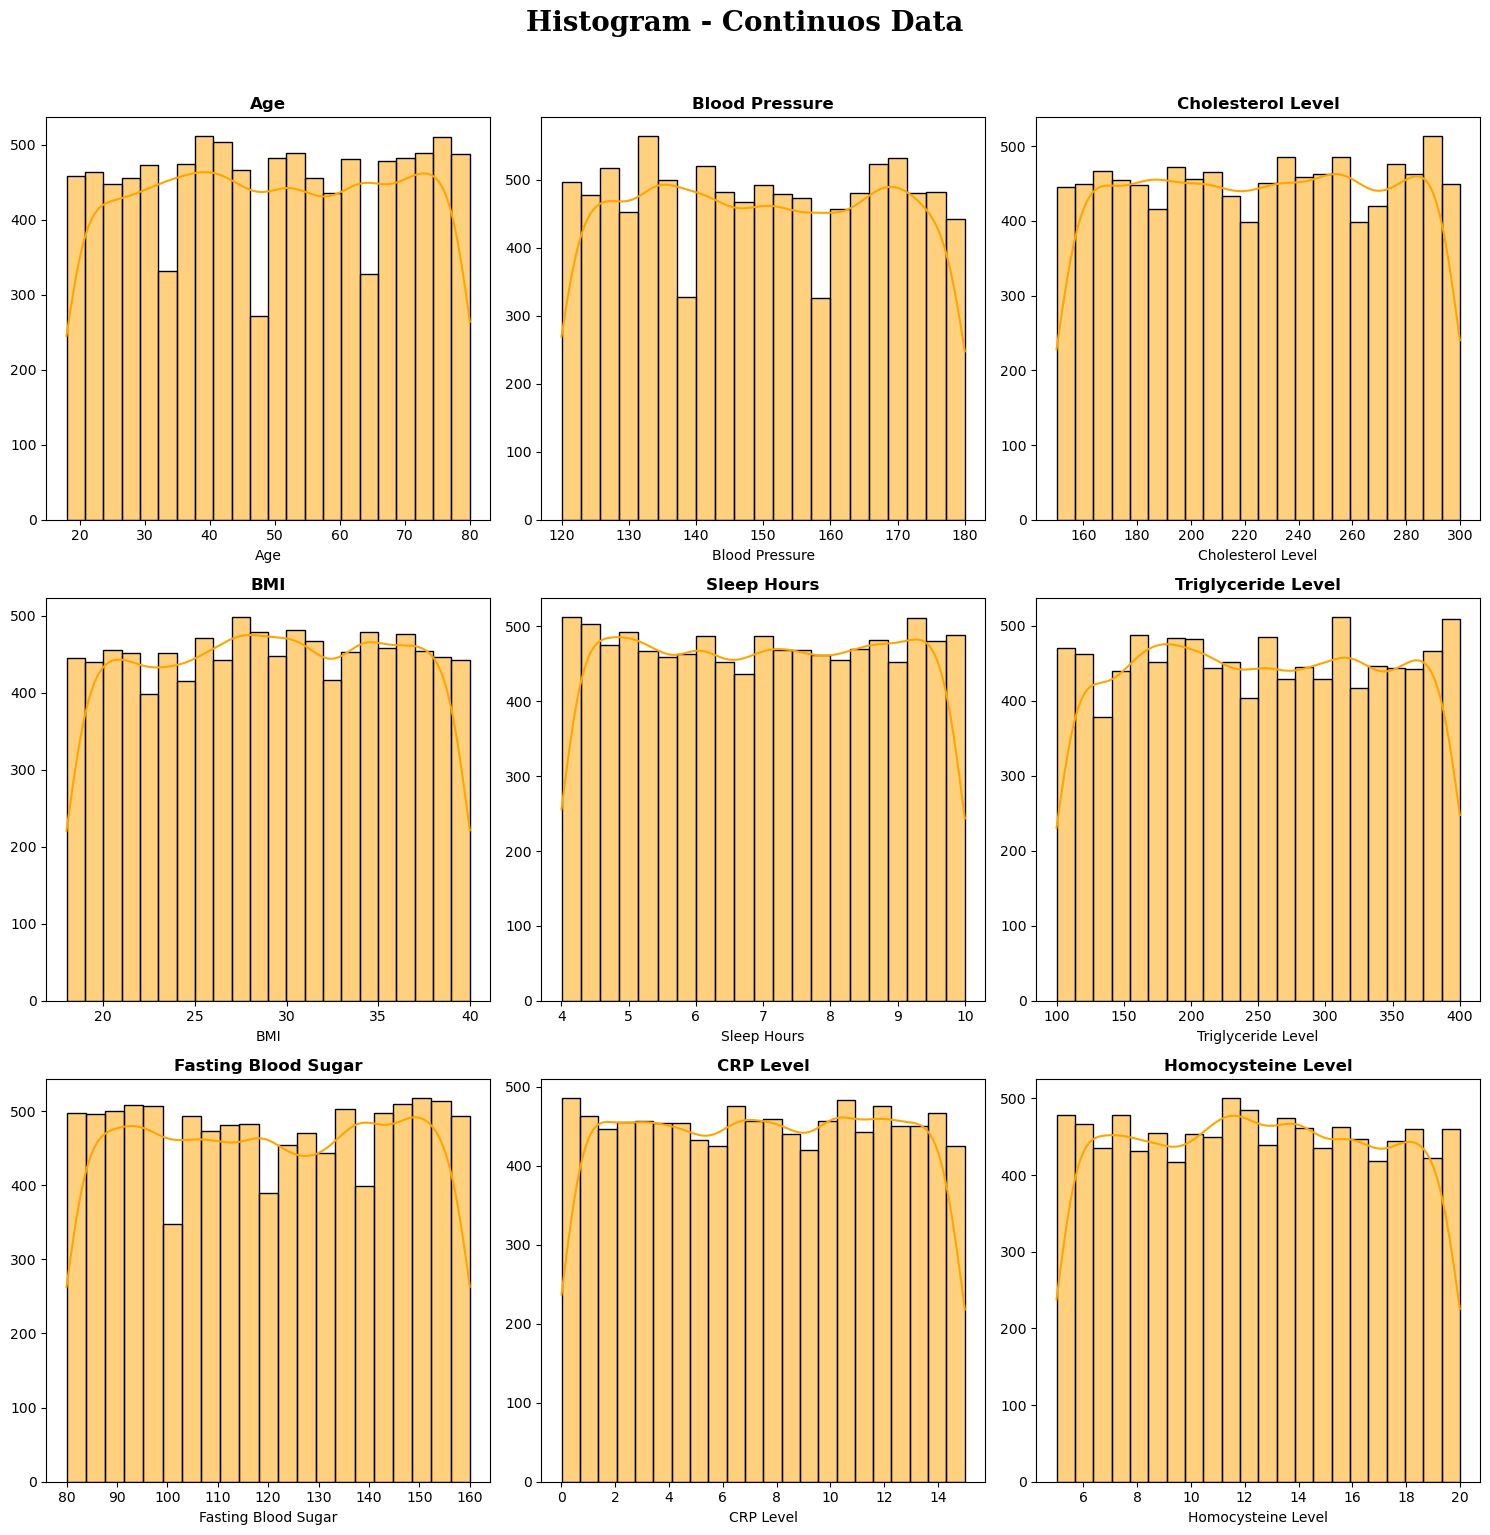

In [104]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()


for i, column in enumerate(continuos_data.columns):
    ax = sns.histplot(df[column], ax=axs[i], kde=True, color='orange')
    axs[i].set_title(column,fontweight='bold')
    axs[i].set_ylabel('') # Removed y-axis label


    fig.suptitle(
        "Histogram - Continuos Data",
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
        y=1.02
    )

plt.tight_layout()
plt.show()

In [105]:
df.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [106]:
#Handling missing values
df1 = df.dropna(subset=df.columns.difference(['Alcohol Consumption'])).reset_index(drop=True)
df1.isnull().sum()

Age                        0
Gender                     0
Blood Pressure             0
Cholesterol Level          0
Exercise Habits            0
Smoking                    0
Family Heart Disease       0
Diabetes                   0
BMI                        0
High Blood Pressure        0
Low HDL Cholesterol        0
High LDL Cholesterol       0
Alcohol Consumption     2465
Stress Level               0
Sleep Hours                0
Sugar Consumption          0
Triglyceride Level         0
Fasting Blood Sugar        0
CRP Level                  0
Homocysteine Level         0
Heart Disease Status       0
dtype: int64

In [107]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9532 entries, 0 to 9531
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9532 non-null   float64
 1   Gender                9532 non-null   object 
 2   Blood Pressure        9532 non-null   float64
 3   Cholesterol Level     9532 non-null   float64
 4   Exercise Habits       9532 non-null   object 
 5   Smoking               9532 non-null   object 
 6   Family Heart Disease  9532 non-null   object 
 7   Diabetes              9532 non-null   object 
 8   BMI                   9532 non-null   float64
 9   High Blood Pressure   9532 non-null   object 
 10  Low HDL Cholesterol   9532 non-null   object 
 11  High LDL Cholesterol  9532 non-null   object 
 12  Alcohol Consumption   7067 non-null   object 
 13  Stress Level          9532 non-null   object 
 14  Sleep Hours           9532 non-null   float64
 15  Sugar Consumption    

In [108]:
df1_categorical = df1.select_dtypes(include=['object'])

#Displaying unique values for each column 
cat_unique_values = df1_categorical.apply(pd.Series.unique)
cat_unique_values

Gender                            [Female, Male]
Exercise Habits              [High, Low, Medium]
Smoking                                [No, Yes]
Family Heart Disease                   [Yes, No]
Diabetes                               [Yes, No]
High Blood Pressure                    [No, Yes]
Low HDL Cholesterol                    [Yes, No]
High LDL Cholesterol                   [No, Yes]
Alcohol Consumption     [Medium, Low, nan, High]
Stress Level                 [High, Low, Medium]
Sugar Consumption            [Medium, Low, High]
Heart Disease Status                   [No, Yes]
dtype: object

In [109]:
#droping 'Alcohol Consumption' column 
df2 = df1.drop(columns=['Alcohol Consumption'], axis=1)
df2_categorical = df2.select_dtypes(include=['object']).columns

In [110]:
df2_categorical

Index(['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
       'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
       'High LDL Cholesterol', 'Stress Level', 'Sugar Consumption',
       'Heart Disease Status'],
      dtype='object')

In [111]:
ohe = OneHotEncoder()
ohe_df2 = ohe.fit_transform(df2[['Gender', 'Smoking', 'Family Heart Disease', 'Diabetes',
              'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol']])
#Convert the data into a new dataframe with new column names created based on the feature values
df2_onehot_encoded = pd.DataFrame(ohe_df2.toarray(), columns=ohe.get_feature_names_out(['Gender', 'Smoking', 'Family Heart Disease', 'Diabetes',
              'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol']))

df2_onehot_encoded

,Gender_Female,Gender_Male,Smoking_No,Smoking_Yes,Family Heart Disease_No,Family Heart Disease_Yes,Diabetes_No,Diabetes_Yes,High Blood Pressure_No,High Blood Pressure_Yes,Low HDL Cholesterol_No,Low HDL Cholesterol_Yes,High LDL Cholesterol_No,High LDL Cholesterol_Yes
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9528,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9529,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
9530,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [112]:
#Categorise the Variables for label encoding
df2_label_encoder = df2[['Exercise Habits', 'Stress Level', 'Sugar Consumption']]
df2_label_encoder

,Exercise Habits,Stress Level,Sugar Consumption
0,High,High,Medium
1,Low,Low,Low
2,High,High,High
3,Low,High,High
4,Low,Medium,Low
...,...,...,...
9527,Medium,High,Medium
9528,Medium,High,Low
9529,High,Low,Low
9530,Low,High,Medium


In [113]:
# Label encoding for ordinal categorical value ('Exercise Habits', 'Stress Level', 'Sugar Consumption')
encode={
    'Exercise Habits': {'Low':0,'Medium':1,'High':2},
    'Stress Level': {'Low':0,'Medium':1,'High':2},
    'Sugar Consumption':{'Low':0,'Medium':1,'High':2}
}
df2_label_encoder.replace(encode,inplace=True)
df2_label_encoder

C:\Users\hp\AppData\Local\Temp\ipykernel_22260\1997698354.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2_label_encoder.replace(encode,inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_22260\1997698354.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_label_encoder.replace(encode,inplace=True)


,Exercise Habits,Stress Level,Sugar Consumption
0,2,2,1
1,0,0,0
2,2,2,2
3,0,2,2
4,0,1,0
...,...,...,...
9527,1,2,1
9528,1,2,0
9529,2,0,0
9530,0,2,1


In [114]:
df3_alcohol = df1[['Alcohol Consumption']].copy()
df3_alcohol['Alcohol Consumption']
df3_alcohol['Alcohol Consumption'].replace(["Low", "Medium", "High"], [0,1,2], inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_22260\3805025637.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3_alcohol['Alcohol Consumption'].replace(["Low", "Medium", "High"], [0,1,2], inplace = True)
C:\Users\hp\AppData\Local\Temp\ipykernel_22260\3805025637.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

In [115]:
df3_alcohol

,Alcohol Consumption
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
9527,1.0
9528,NaN
9529,NaN
9530,1.0


In [116]:
df4 = df1[['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours', 'Triglyceride Level',
             'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']]
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9532 entries, 0 to 9531
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  9532 non-null   float64
 1   Blood Pressure       9532 non-null   float64
 2   Cholesterol Level    9532 non-null   float64
 3   BMI                  9532 non-null   float64
 4   Sleep Hours          9532 non-null   float64
 5   Triglyceride Level   9532 non-null   float64
 6   Fasting Blood Sugar  9532 non-null   float64
 7   CRP Level            9532 non-null   float64
 8   Homocysteine Level   9532 non-null   float64
dtypes: float64(9)
memory usage: 670.3 KB


In [117]:
#Combine all df4, df2_onehot_encoded, df2_label_encoder, df3_alcohol dataframes
final_df = pd.concat([df4, df2_onehot_encoded, df2_label_encoder, df3_alcohol['Alcohol Consumption']], axis=1)
final_df

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Gender_Female,...,High Blood Pressure_No,High Blood Pressure_Yes,Low HDL Cholesterol_No,Low HDL Cholesterol_Yes,High LDL Cholesterol_No,High LDL Cholesterol_Yes,Exercise Habits,Stress Level,Sugar Consumption,Alcohol Consumption
0,69.0,146.0,286.0,25.221799,8.744034,133.0,157.0,9.355389,19.298875,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,2,2,1,1.0
1,46.0,126.0,216.0,29.855447,4.440440,393.0,92.0,12.709873,11.230926,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0.0
2,32.0,122.0,293.0,24.130477,5.249405,293.0,94.0,12.509046,5.961958,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,2,2,2,0.0
3,60.0,166.0,242.0,20.486289,7.030971,263.0,154.0,10.381259,8.153887,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0,2,2,0.0
4,25.0,152.0,257.0,28.144681,5.504876,126.0,91.0,4.297575,10.815983,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,25.0,136.0,243.0,18.788791,6.834954,343.0,133.0,3.588814,19.132004,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1,2,1,1.0
9528,38.0,172.0,154.0,31.856801,8.247784,377.0,83.0,2.658267,9.715709,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1,2,0,NaN
9529,73.0,152.0,201.0,26.899911,4.436762,248.0,88.0,4.408867,9.492429,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,2,0,0,NaN
9530,23.0,142.0,299.0,34.964026,8.526329,113.0,153.0,7.215634,11.873486,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0,2,1,1.0


In [118]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9532 entries, 0 to 9531
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       9532 non-null   float64
 1   Blood Pressure            9532 non-null   float64
 2   Cholesterol Level         9532 non-null   float64
 3   BMI                       9532 non-null   float64
 4   Sleep Hours               9532 non-null   float64
 5   Triglyceride Level        9532 non-null   float64
 6   Fasting Blood Sugar       9532 non-null   float64
 7   CRP Level                 9532 non-null   float64
 8   Homocysteine Level        9532 non-null   float64
 9   Gender_Female             9532 non-null   float64
 10  Gender_Male               9532 non-null   float64
 11  Smoking_No                9532 non-null   float64
 12  Smoking_Yes               9532 non-null   float64
 13  Family Heart Disease_No   9532 non-null   float64
 14  Family H

In [119]:
final_df.isna().sum()

Age                            0
Blood Pressure                 0
Cholesterol Level              0
BMI                            0
Sleep Hours                    0
Triglyceride Level             0
Fasting Blood Sugar            0
CRP Level                      0
Homocysteine Level             0
Gender_Female                  0
Gender_Male                    0
Smoking_No                     0
Smoking_Yes                    0
Family Heart Disease_No        0
Family Heart Disease_Yes       0
Diabetes_No                    0
Diabetes_Yes                   0
High Blood Pressure_No         0
High Blood Pressure_Yes        0
Low HDL Cholesterol_No         0
Low HDL Cholesterol_Yes        0
High LDL Cholesterol_No        0
High LDL Cholesterol_Yes       0
Exercise Habits                0
Stress Level                   0
Sugar Consumption              0
Alcohol Consumption         2465
dtype: int64

In [120]:
# Using Simple Imputer to fill the missing values in Alcohol Consumption
imputer = SimpleImputer(strategy='mean')
final_df['Alcohol Consumption'] = imputer.fit_transform(final_df[['Alcohol Consumption']])

In [121]:
final_df.isnull().sum()

Age                         0
Blood Pressure              0
Cholesterol Level           0
BMI                         0
Sleep Hours                 0
Triglyceride Level          0
Fasting Blood Sugar         0
CRP Level                   0
Homocysteine Level          0
Gender_Female               0
Gender_Male                 0
Smoking_No                  0
Smoking_Yes                 0
Family Heart Disease_No     0
Family Heart Disease_Yes    0
Diabetes_No                 0
Diabetes_Yes                0
High Blood Pressure_No      0
High Blood Pressure_Yes     0
Low HDL Cholesterol_No      0
Low HDL Cholesterol_Yes     0
High LDL Cholesterol_No     0
High LDL Cholesterol_Yes    0
Exercise Habits             0
Stress Level                0
Sugar Consumption           0
Alcohol Consumption         0
dtype: int64

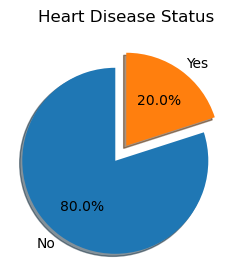

In [122]:
plt.figure(figsize=(3, 4))
plt.pie(df1['Heart Disease Status'].value_counts(), labels=df1['Heart Disease Status'].value_counts().index, autopct='%1.1f%%',explode =[0.2, 0], shadow = True,startangle=90)
plt.title('Heart Disease Status')
plt.show()

In [123]:
final_df['Heart Disease Status'] = df1['Heart Disease Status']
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9532 entries, 0 to 9531
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       9532 non-null   float64
 1   Blood Pressure            9532 non-null   float64
 2   Cholesterol Level         9532 non-null   float64
 3   BMI                       9532 non-null   float64
 4   Sleep Hours               9532 non-null   float64
 5   Triglyceride Level        9532 non-null   float64
 6   Fasting Blood Sugar       9532 non-null   float64
 7   CRP Level                 9532 non-null   float64
 8   Homocysteine Level        9532 non-null   float64
 9   Gender_Female             9532 non-null   float64
 10  Gender_Male               9532 non-null   float64
 11  Smoking_No                9532 non-null   float64
 12  Smoking_Yes               9532 non-null   float64
 13  Family Heart Disease_No   9532 non-null   float64
 14  Family H

In [124]:
# Separate majority and minority classes from the optimized dataframe
df_majority = final_df[final_df['Heart Disease Status'] == 'No']
df_minority = final_df[final_df['Heart Disease Status'] == 'Yes']

# Upsample minority class
df_minority_upsampled = df_minority.sample(replace=True,             # Sample with replacement
                                           n=len(df_majority),    # Number of samples to match majority class
                                           random_state=42) # for reproducibility

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the upsampled dataframe
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

display(df_upsampled['Heart Disease Status'].value_counts())
# Standarization 
scaler=StandardScaler()
df_upsampled[['Age','Blood Pressure','Cholesterol Level','BMI','Sleep Hours','Triglyceride Level','Fasting Blood Sugar','CRP Level','Homocysteine Level']]=scaler.fit_transform(df_upsampled[['Age','Blood Pressure','Cholesterol Level','BMI','Sleep Hours','Triglyceride Level','Fasting Blood Sugar','CRP Level','Homocysteine Level']])

encode={
    'Heart Disease Status': {'Yes':1,'No':0}
}
df_upsampled.replace(encode,inplace=True)
# Prepare data for training

x_upsampled = df_upsampled.drop('Heart Disease Status', axis=1)
y_upsampled = df_upsampled['Heart Disease Status']

# Split the upsampled data into training and testing sets

x_train_resampled, x_test_upsampled, y_train_resampled, y_test_upsampled = train_test_split(x_upsampled, y_upsampled, test_size=0.2, random_state=42)

x_train = x_train_resampled
y_train = y_train_resampled
x_test = x_test_upsampled
y_test = y_test_upsampled

Heart Disease Status
Yes    7621
No     7621
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_22260\2674982211.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_upsampled.replace(encode,inplace=True)


In [125]:
df_upsampled.head()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Gender_Female,...,High Blood Pressure_Yes,Low HDL Cholesterol_No,Low HDL Cholesterol_Yes,High LDL Cholesterol_No,High LDL Cholesterol_Yes,Exercise Habits,Stress Level,Sugar Consumption,Alcohol Consumption,Heart Disease Status
0,-0.946941,-1.636475,-0.714662,0.490319,1.083468,1.062942,-1.311466,1.532691,-1.140859,0.0,...,1.0,1.0,0.0,0.0,1.0,0,2,1,2.000000,1
1,1.365828,-0.553410,0.618157,1.421386,1.040214,-0.103907,0.042689,1.146321,0.287571,0.0,...,1.0,1.0,0.0,0.0,1.0,1,2,0,1.000000,1
2,-1.002007,-0.895431,1.054770,-0.441387,-1.630583,-0.973324,-1.650004,0.864774,-0.276649,0.0,...,0.0,1.0,0.0,1.0,0.0,1,0,2,0.000000,1
3,-0.396282,1.612720,1.468404,0.719342,0.418431,0.662553,1.227575,0.705373,-1.134244,0.0,...,1.0,0.0,1.0,1.0,0.0,1,2,0,0.000000,1
4,-0.946941,-0.895431,-1.450011,0.354029,-0.074523,0.822709,1.100623,0.512518,-0.799484,1.0,...,1.0,0.0,1.0,1.0,0.0,1,0,1,0.990661,1


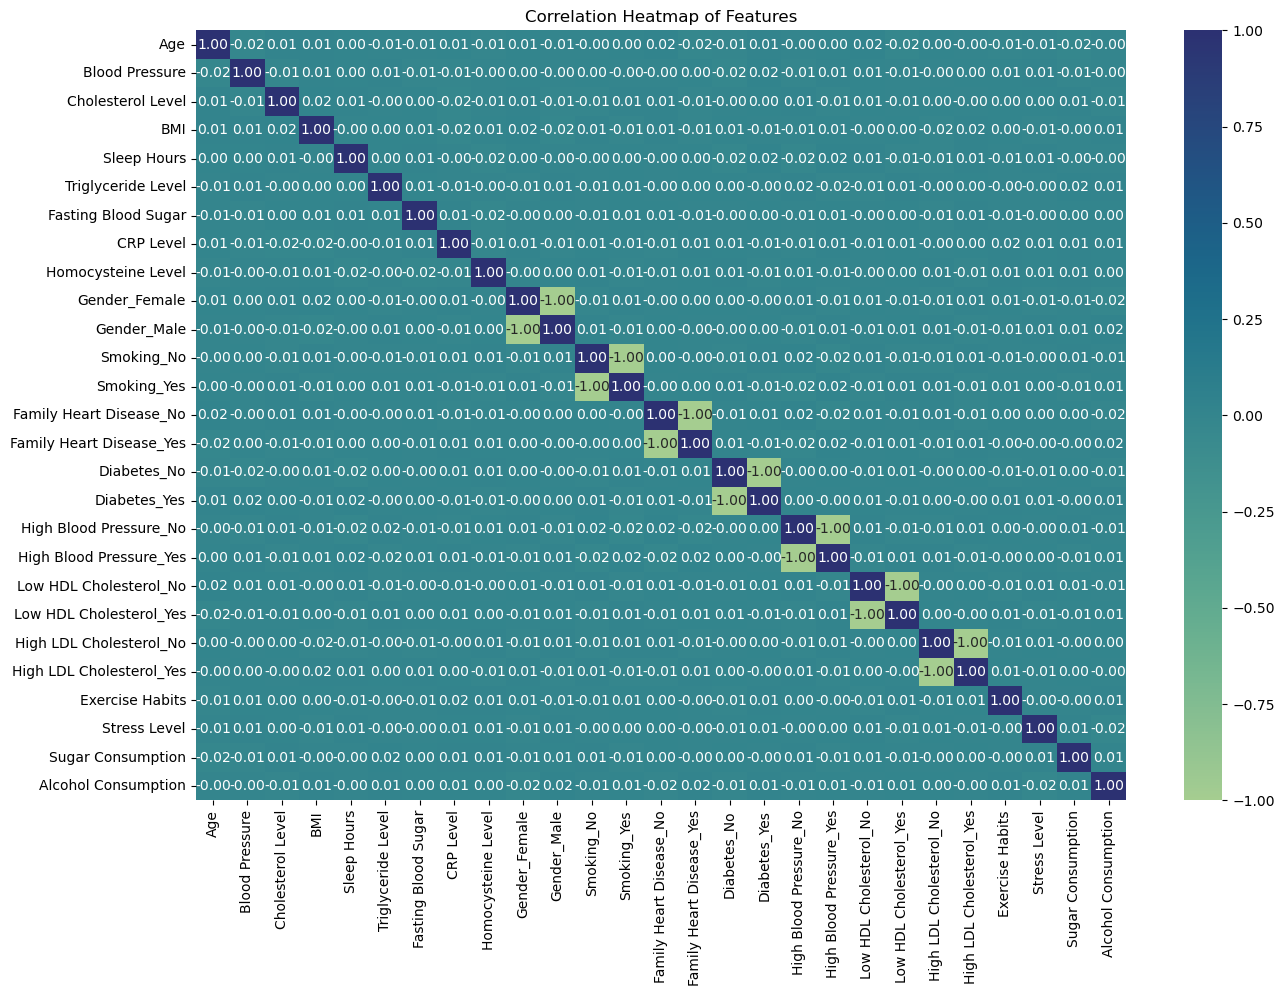

In [126]:
plt.figure(figsize=(15, 10))
sns.heatmap(final_df.corr(numeric_only=True), annot=True, cmap='crest', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

In [127]:
#making a function for model training and evaluation
def evaluate_model(model):
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    accuracy=accuracy_score(y_test, y_pred)
    cross_val= cross_val_score(model,x_upsampled, y_upsampled,cv=5)
    avg_cross_val= np.mean(cross_val)
    confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
    cm_display.plot()
    plt.show()
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_score1 = f1_score(y_test, y_pred)
    print(f"precision:{precision}, recall:{recall}, f1_score1:{f1_score1}")
    print(confusion_matrix)
    print(f"{model.__class__.__name__} : Accuracy={accuracy}, Cross_val_score={avg_cross_val}")
    return avg_cross_val

In [134]:
models={
    LogisticRegression(),
    svm.SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(), 
}

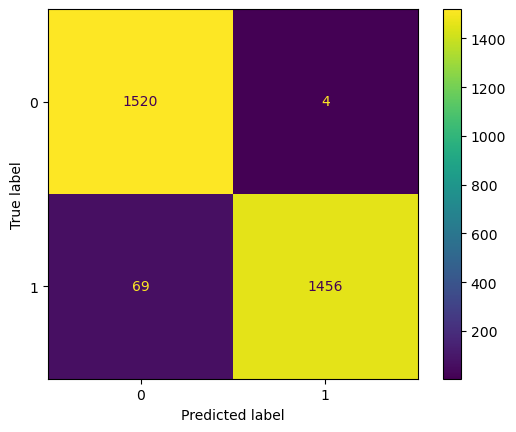

precision:0.9972602739726028, recall:0.9547540983606557, f1_score1:0.9755443886097153
[[1520    4]
 [  69 1456]]
RandomForestClassifier : Accuracy=0.9760577238438832, Cross_val_score=0.9784149142311623


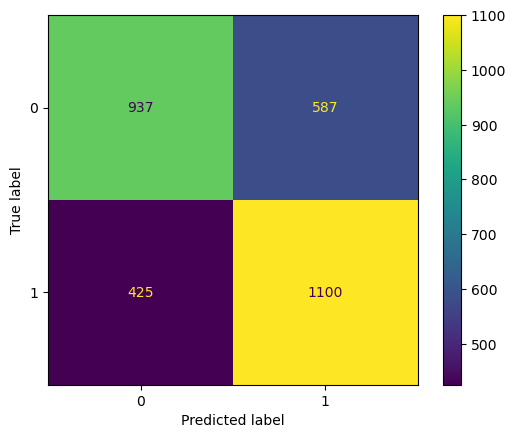

precision:0.6520450503852994, recall:0.7213114754098361, f1_score1:0.684931506849315
[[ 937  587]
 [ 425 1100]]
SVC : Accuracy=0.6680878976713677, Cross_val_score=0.6665141920805324


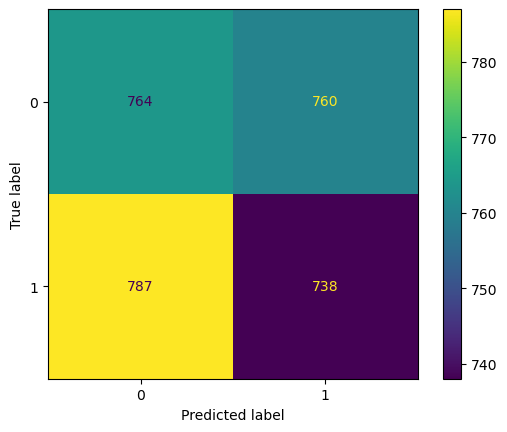

precision:0.49265687583444595, recall:0.4839344262295082, f1_score1:0.4882566986437314
[[764 760]
 [787 738]]
LogisticRegression : Accuracy=0.4926205313217448, Cross_val_score=0.5048567406033905


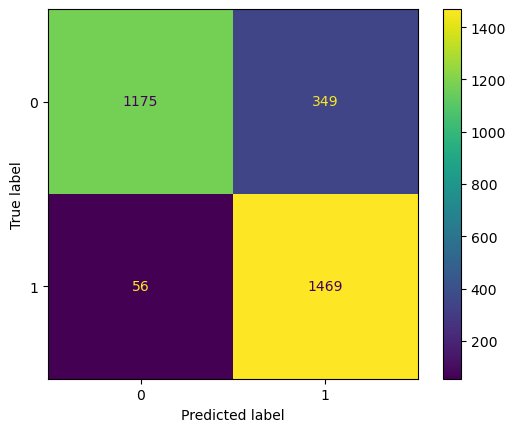

precision:0.8080308030803081, recall:0.9632786885245902, f1_score1:0.8788513311396949
[[1175  349]
 [  56 1469]]
DecisionTreeClassifier : Accuracy=0.867169563791407, Cross_val_score=0.8660938485919827


In [135]:
for model in models:
    model_score={model.__class__.__name__:evaluate_model(model)} 

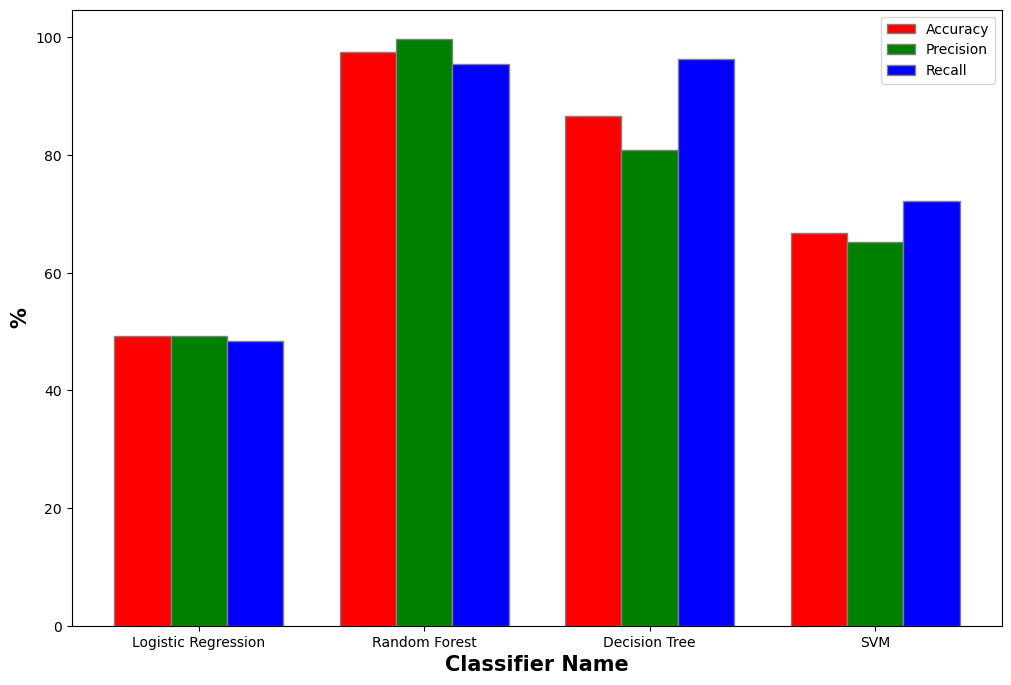

In [137]:
#generating bar graph to show the accuracy, precision and recall
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

Accuracy = [49.26,97.60,86.71,66.80] 
Precision = [49.26,99.72,80.80,65.20] 
Recall = [48.39,95.47,96.32,72.13] 

br1 = np.arange(len(Accuracy)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

plt.bar(br1, Accuracy, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Accuracy') 
plt.bar(br2, Precision, color ='g', width = barWidth, 
        edgecolor ='grey', label ='Precision') 
plt.bar(br3, Recall, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Recall') 

plt.xlabel('Classifier Name', fontweight ='bold', fontsize = 15) 
plt.ylabel('%', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(Recall))], 
        ['Logistic Regression', 'Random Forest', 'Decision Tree','SVM'])

plt.legend()
plt.show()